# SMS spam detector

<u>Tags</u>: Data manipulation, Natural language processing, Supervised machine learning, Deep learning with Keras

<u>Principal packages</u>: Pandas, Numpy, Keras

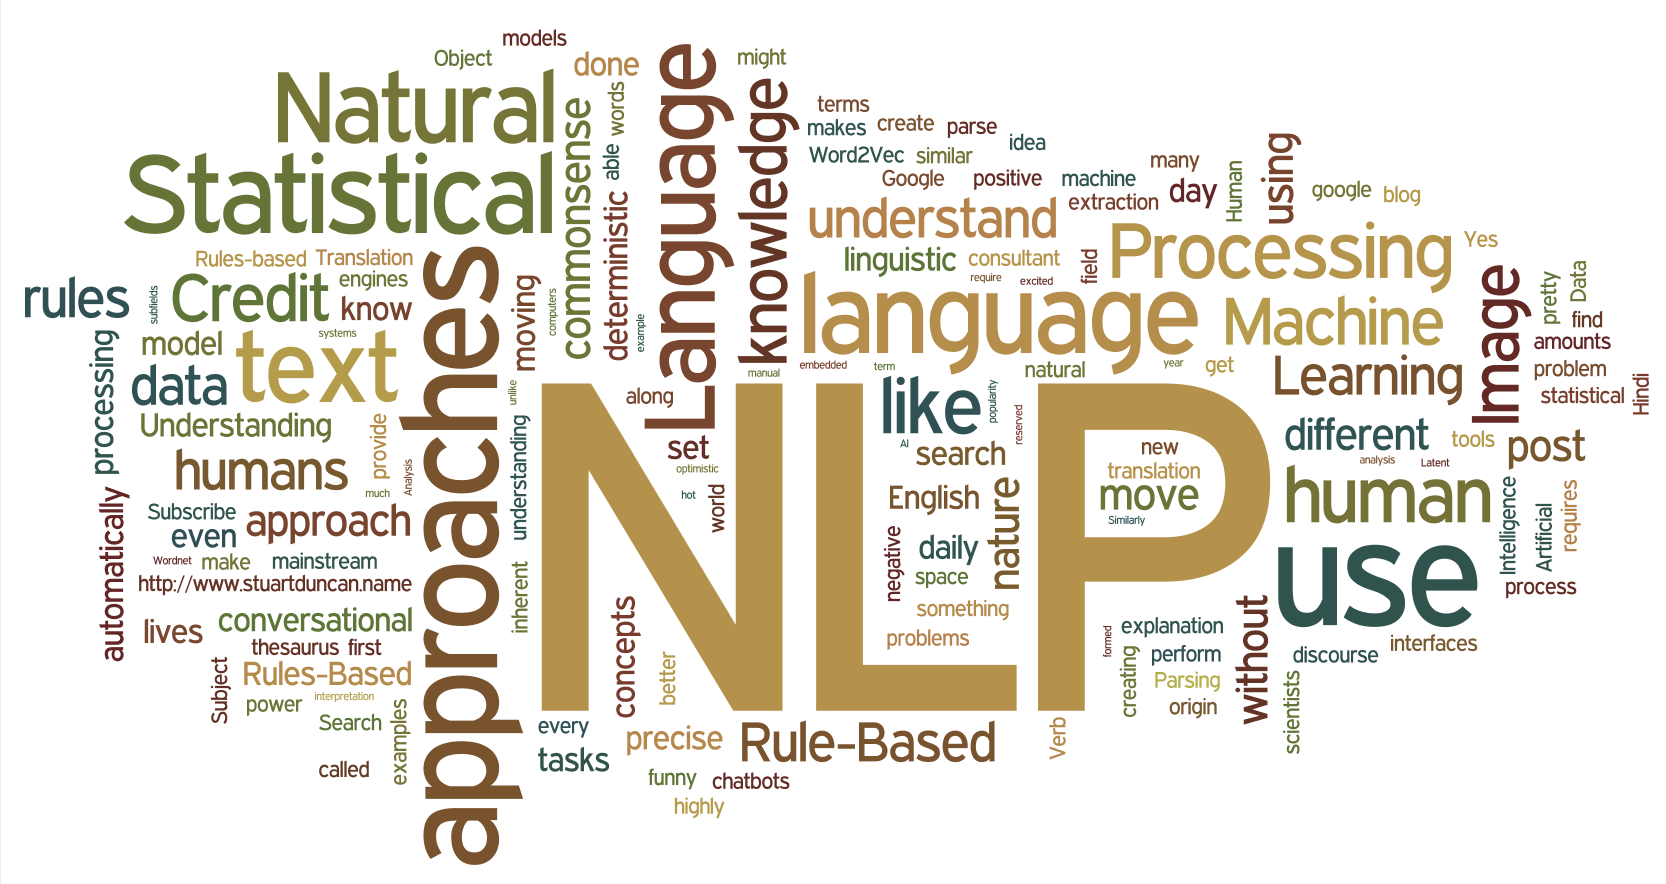

In [2]:
from IPython.display import Image
Image(filename='images/nlp-avant.png') 

## Dataset presentation

Spam is unsolicited and unwanted messages sent electronically and whose content may be malicious. Email spam is sent/received over the Internet while SMS spam is typically transmitted over a mobile network. We’ll refer to user that sent spam as ‘spammers’. SMS messages are usually very cheap (if not free) for the user to send, making it appealing for unrightful exploitation. This is further aggravated by the fact that SMS is usually regarded by the user as a safer, more trustworthy form of communication than other sources, e. g., emails.

The dangers of spam messages for the users are many: undesired advertisement, exposure of private information, becoming a victim of a fraud or financial scheme, being lured into malware and phishing websites, involuntary exposition to inappropriate content, etc. For the network operator, spam messages result in an increased cost in operations.

In the case under study, spam is an annoyance to the user and thus detrimental to the quality of the service that hurts the brand in the process. This can lead to complaints, low ratings and even loss of users, not to mention users getting scammed.

The dataset I will use come from the dataset colection of Kaggle <sup>1</sup>. 
Here are the details:

<b><code>spam</code>:</b> SMS fraudulent (real/fake)

<b><code>text</code>:</b> textual content of SMS

<sup>1</sup><a href="https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset">SMS Spam Collection Dataset</a>

From there, the aim is to explore and manipulate existing data to detect fraudulent SMS.

## Imports and dataset exploration

In [3]:
import pandas as pd
import numpy as np
# print("Pandas version : ", pd.__version__)

In [4]:
df = pd.read_csv("datasets/spam.csv")

In [5]:
df_corr = df[["v1", "v2"]].rename(columns = {"v1":"spam", "v2":"text"})
df_corr["spam"] = df_corr["spam"].str.replace("spam", "fake")
df_corr["spam"] = df_corr["spam"].str.replace("ham", "real")

print(df_corr.head())
print(df_corr.describe()) 

print("\nProportion of real and fake in spam variable (in %) : ")
print(df_corr.groupby("spam").size() / df_corr.shape[0] * 100)

print("\nAbout missing data : ")
print("Shape of dataset : ", df_corr.shape)
print(df_corr.info())
print("There i no missing data in the dataset.")

   spam                                               text
0  real  Go until jurong point, crazy.. Available only ...
1  real                      Ok lar... Joking wif u oni...
2  fake  Free entry in 2 a wkly comp to win FA Cup fina...
3  real  U dun say so early hor... U c already then say...
4  real  Nah I don't think he goes to usf, he lives aro...
        spam                    text
count   5572                    5572
unique     2                    5169
top     real  Sorry, I'll call later
freq    4825                      30

Proportion of real and fake in spam variable (in %) : 
spam
fake    13.406317
real    86.593683
dtype: float64

About missing data : 
Shape of dataset :  (5572, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [6]:
print("Top 5 of text content (count) : ")
print(df_corr["text"].value_counts(sort = True).head(n = 5))

print("\nTop 5 of text content (in %) : ")
print(df_corr["text"].value_counts(sort = True, normalize = True).head(n = 5))

Top 5 of text content (count) : 
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
Name: text, dtype: int64

Top 5 of text content (in %) : 
Sorry, I'll call later                                     

## Text breakdown
### Count model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_corr['text'], df_corr['spam'], test_size=0.33, random_state=53)

count_vectorizer = CountVectorizer(stop_words = 'english') 
# Every language contains 'empty words', linking words which alone do not provide relevant information.

count_train = count_vectorizer.fit_transform(X_train.values) 
count_test = count_vectorizer.transform(X_test.values)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])


['00', '000', '008704050406', '0089', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400']


### Tf-idf model
Tf-idf (term frequency-inverse document frequency) is a weighting method. It is a statistical measure to evaluate the importance of a term contained in a document, relative to a collection or corpus. The weight increases in proportion to the number of occurrences of the word in the document. It also varies according to the frequency of the word in the corpus<sup>1</sup>.

<sup>1</sup><a href="https://fr.wikipedia.org/wiki/TF-IDF">Wikipédia page</a>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = "english", max_df = 0.7) # Initialize a TfidfVectorizer object

tfidf_train = tfidf_vectorizer.fit_transform(X_train.values) # Transform data
tfidf_test = tfidf_vectorizer.transform(X_test.values)

print(tfidf_vectorizer.get_feature_names()[:10])

print(tfidf_train.A[:5])

['00', '000', '008704050406', '0089', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names()) # Compile les mots et leurs fréquences dans un même dataset
tfidf_df = pd.DataFrame(tfidf_train.A, columns = count_vectorizer.get_feature_names()) # Idem, dans modèle tfidf

print(count_df.head())
print(tfidf_df.head())

   00  000  008704050406  0089  01223585236  ...  zed  zeros  zhong  zoe  zogtorius
0   0    0             0     0            0  ...    0      0      0    0          0
1   0    0             0     0            0  ...    0      0      0    0          0
2   0    0             0     0            0  ...    0      0      0    0          0
3   0    0             0     0            0  ...    0      0      0    0          0
4   0    0             0     0            0  ...    0      0      0    0          0

[5 rows x 6708 columns]
    00  000  008704050406  0089  01223585236  ...  zed  zeros  zhong  zoe  zogtorius
0  0.0  0.0           0.0   0.0          0.0  ...  0.0    0.0    0.0  0.0        0.0
1  0.0  0.0           0.0   0.0          0.0  ...  0.0    0.0    0.0  0.0        0.0
2  0.0  0.0           0.0   0.0          0.0  ...  0.0    0.0    0.0  0.0        0.0
3  0.0  0.0           0.0   0.0          0.0  ...  0.0    0.0    0.0  0.0        0.0
4  0.0  0.0           0.0   0.0          0.0  

### Naive Bayes model
#### Count model

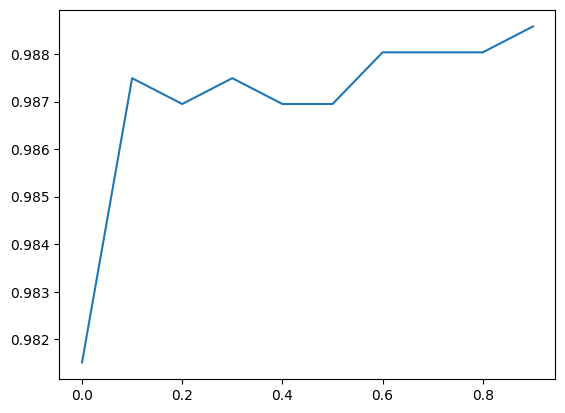


Best accuracy :
x =  0.9 ; y =  0.9885807504078303


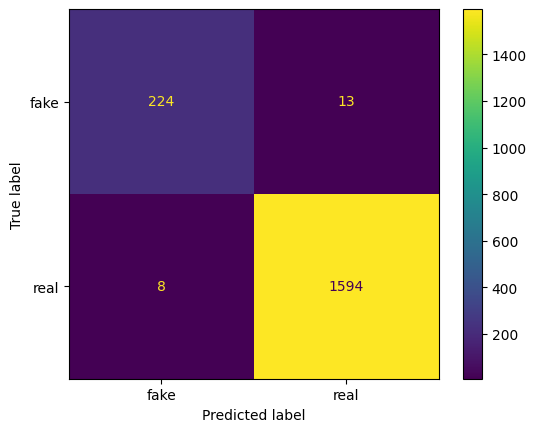

In [10]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

alphas = np.arange(0, 1, 0.1)

def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha = alpha)
    # Fit to the training data
    nb_classifier.fit(count_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
x = []
y = []
for alpha in alphas:
    x.append(alpha)
    y.append(train_and_predict(alpha))

plt.plot(x, y)
plt.show()

print("\nBest accuracy :")
print("x = ", x[-1], "; y = ", y[-1])

nb_classifier = MultinomialNB(alpha = x[-1])
nb_classifier.fit(count_train, y_train)

count_pred = nb_classifier.predict(count_test)
count_score_nb = metrics.accuracy_score(y_test, count_pred)

cm = metrics.confusion_matrix(y_test, count_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb_classifier.classes_)
disp.plot()
plt.show()

#### Tf-idf model

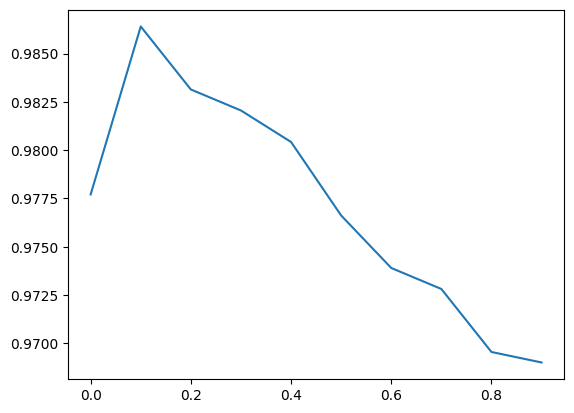


Best accuracy :
x =  0.1 ; y =  0.9864056552474171
0.1
Accuracy: 0.9864056552474171
Confusion matrix: 


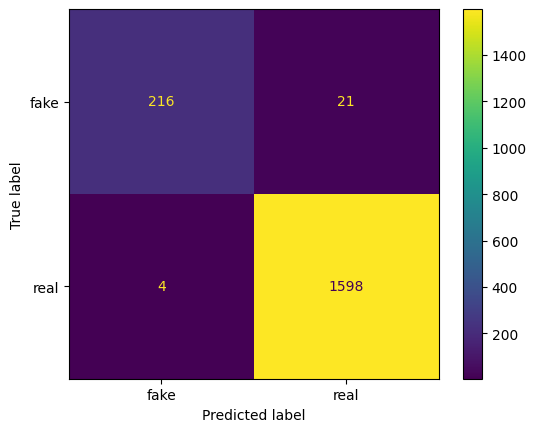

In [11]:
nb_classifier = MultinomialNB()
alphas = np.arange(0, 1, 0.1)

def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha = alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
x = []
y = []
for alpha in alphas:
    x.append(alpha)
    y.append(train_and_predict(alpha))

plt.plot(x, y)
plt.show()

print("\nBest accuracy :")
print("x = ", x[1], "; y = ", y[1])

nb_classifier = MultinomialNB(alpha = x[1])
print(x[1])
nb_classifier.fit(tfidf_train, y_train)

tfidf_pred = nb_classifier.predict(tfidf_test)
tfidf_score_nb = metrics.accuracy_score(y_test, tfidf_pred)
print("Accuracy:", tfidf_score_nb )
print("Confusion matrix: ")
cm = metrics.confusion_matrix(y_test, tfidf_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot()
plt.show()

### SVM

Confusion matrix for count_model : 


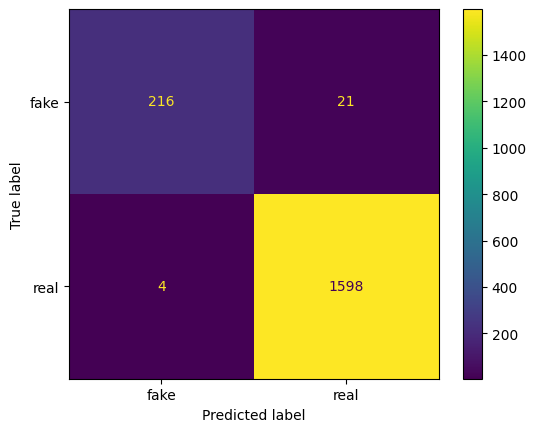

Confusion matrix for tfidf_model : 


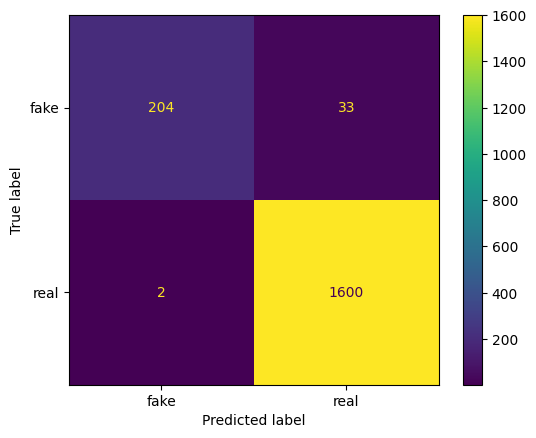

About SVM : Accuracy for count_model :  0.9782490483958673 ; Accuracy for tfidf_model :  0.9809679173463839
About Naive Bayes : Accuracy for count_model :  0.9885807504078303 ; Accuracy for tfidf_model :  0.9864056552474171


In [12]:
from sklearn import svm

# Count model
count_svm_mod = svm.SVC()
count_svm_mod.fit(count_train, y_train)

count_pred = count_svm_mod.predict(count_test)
count_score_svm = metrics.accuracy_score(y_test, count_pred)
    
count_cm = metrics.confusion_matrix(y_test, count_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb_classifier.classes_)
disp.plot()

print("Confusion matrix for count_model : ")
plt.show()

# tfidf model
tfidf_svm_mod = svm.SVC()
tfidf_svm_mod.fit(tfidf_train, y_train)

tfidf_pred = tfidf_svm_mod.predict(tfidf_test)
tfidf_score_svm = metrics.accuracy_score(y_test, tfidf_pred)

cm = metrics.confusion_matrix(y_test, tfidf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot()

print("Confusion matrix for tfidf_model : ")
plt.show()

print("About SVM : Accuracy for count_model : ", count_score_svm, "; Accuracy for tfidf_model : ", tfidf_score_svm)
print("About Naive Bayes : Accuracy for count_model : ", count_score_nb, "; Accuracy for tfidf_model : ", tfidf_score_nb)

The best score is obtain with naive bayes model on tfidf model (accuracy = 0.9864).

# Tensorflow

Loss function : categorical_crossentropy


2022-12-21 14:24:43.314179: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-21 14:24:43.314200: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-21 14:24:43.314218: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7c6b2e60-d49d-4aec-836e-8656e31b6dbc): /proc/driver/nvidia/version does not exist
2022-12-21 14:24:43.314433: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
82/82 [==============================] - 1s 9ms/step - loss: 0.3502 - accuracy: 0.9273 - val_loss: 0.1330 - val_accuracy: 0.9714
Epoch 2/20
82/82 [==============================] - 1s 6ms/step - loss: 0.0637 - accuracy: 0.9870 - val_loss: 0.0728 - val_accuracy: 0.9830
Epoch 3/20
82/82 [==============================] - 1s 7ms/step - loss: 0.0220 - accuracy: 0.9966 - val_loss: 0.0686 - val_accuracy: 0.9821
Epoch 4/20
82/82 [==============================] - 1s 6ms/step - loss: 0.0113 - accuracy: 0.9989 - val_loss: 0.0687 - val_accuracy: 0.9812
Epoch 5/20
58/58 [==============================] - 0s 2ms/step
Loss function : categorical_crossentropy
Epoch 1/20
82/82 [==============================] - 1s 7ms/step - loss: 0.4554 - accuracy: 0.8576 - val_loss: 0.2681 - val_accuracy: 0.8777
Epoch 2/20
82/82 [==============================] - 0s 6ms/step - loss: 0.1508 - accuracy: 0.9480 - val_loss: 0.1134 - val_accuracy: 0.9688
Epoch 3/20
82/82 [==============================] - 0s 

Text(0, 0.5, 'Accuracy score')

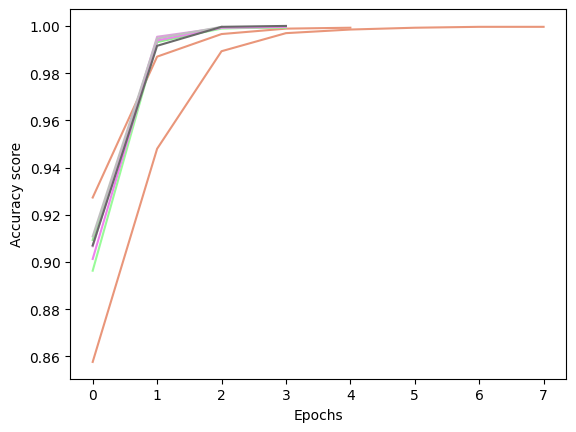

In [13]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

nb_hidden_layer = []
model_type = []
accuracy = []

y_train_corr_temp = y_train.str.replace("real", "1")
y_train_corr = y_train_corr_temp.str.replace("fake", "0")

y_test_corr_temp = y_test.str.replace("real", "1")
y_test_corr = y_test_corr_temp.str.replace("fake", "0")

lr_to_test = [.00001, 0.01, 1]

# --------------------------- accuracy dataframe ---------------------------------
def max_acc(layers, mod, acc):  
    global nb_hidden_layer
    global model_type
    global accuracy
    
    nb_hidden_layer.append(layers)
    model_type.append(mod)
    accuracy.append(acc)
    
# --------------------------- 1 hidden layers ---------------------------------
# count
n_cols = count_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_count = model.fit(count_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(count_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(1, "count", metrics.accuracy_score(y_test_corr.values.astype(int), pred))

# Create the plot
plt.plot(model_count.history['accuracy'], 'darksalmon', label = "model: count, 1 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Validation score')

# tfidf
n_cols = tfidf_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_tfidf = model.fit(tfidf_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(tfidf_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(1, "tfidf", metrics.accuracy_score(y_test_corr.values.astype(int), pred))

# Create the plot
plt.plot(model_tfidf.history['accuracy'], 'darksalmon', label = "model: tfidf, 1 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Validation score')

# --------------------------- 2 hidden layers ---------------------------------
# count
n_cols = count_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_count = model.fit(count_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(count_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(2, "count", metrics.accuracy_score(y_test_corr.values.astype(int), pred))

# Create the plot
plt.plot(model_count.history['accuracy'], 'palegreen', label = "model: count, 2 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Validation score')

# tfidf
n_cols = tfidf_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_tfidf = model.fit(count_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(tfidf_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(2, "tfidf", metrics.accuracy_score(y_test_corr.values.astype(int), pred))

# Create the plot
plt.plot(model_tfidf.history['accuracy'], 'lightgreen', label = "model: tfidf, 2 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Validation score')

# --------------------------- 3 hidden layers ---------------------------------
# count
n_cols = count_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_count = model.fit(count_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(count_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(3, "count", metrics.accuracy_score(y_test_corr.values.astype(int), pred))


# Create the plot
plt.plot(model_count.history['accuracy'], 'plum', label = "model: count, 3 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Validation score')

# tfidf
n_cols = tfidf_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_tfidf = model.fit(count_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(tfidf_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(3, "tfidf", metrics.accuracy_score(y_test_corr.values.astype(int), pred))


# Create the plot
plt.plot(model_tfidf.history['accuracy'], 'violet', label = "model: tfidf, 3 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')

# --------------------------- 4 hidden layers ---------------------------------
# count
n_cols = count_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_count = model.fit(count_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(count_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(4, "count", metrics.accuracy_score(y_test_corr.values.astype(int), pred))


# Create the plot
plt.plot(model_count.history['accuracy'], 'silver', label = "model: count, 4 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Validation score')

# tfidf
n_cols = tfidf_train.shape[1]

model = Sequential() # Model construction
model.add(Dense(100, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = "softmax")) # Couche de sortie

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics = ['accuracy']) # Compilation
print("Loss function : " + model.loss) #Afiche la fonction de perte

target_train = to_categorical(y_train_corr)
target_test = to_categorical(y_test_corr)

early_stopping_monitor = EarlyStopping(patience = 2)
model_tfidf = model.fit(count_train.toarray(), 
		  target_train, 
		  validation_split = 0.3, 
		  epochs = 20,
		  callbacks = [early_stopping_monitor])

pred = model.predict(tfidf_test.toarray())[:, 1]
pred = np.where(pred > 0.5, 1, 0)

max_acc(4, "tfidf", metrics.accuracy_score(y_test_corr.values.astype(int), pred))


plt.plot(model_tfidf.history['accuracy'], 'dimgray', label = "model: tfidf, 4 hidden layer")
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')

## Results of number of hidden layers comparison 

In [14]:
max_acc(None, "SVM_count", count_score_svm)
max_acc(None, "SVM_tfidf", tfidf_score_svm)
max_acc(None, "Naive Bayes_count", count_score_nb)
max_acc(None, "Naive Bayes_tfidf", tfidf_score_nb)

In [15]:
df_acc = pd.DataFrame({"nb_hidden": nb_hidden_layer, 
                    "model": model_type,
                    "accuracy": accuracy})
print(df_acc)

print("\nThe maximum accuracy between all models is: ", max(df_acc["accuracy"]), " from: ")
print(df_acc[df_acc["accuracy"] == max(df_acc["accuracy"])])

    nb_hidden              model  accuracy
0         1.0              count  0.982599
1         1.0              tfidf  0.980424
2         2.0              count  0.985318
3         2.0              tfidf  0.923872
4         3.0              count  0.987493
5         3.0              tfidf  0.964111
6         4.0              count  0.985318
7         4.0              tfidf  0.966286
8         NaN          SVM_count  0.978249
9         NaN          SVM_tfidf  0.980968
10        NaN  Naive Bayes_count  0.988581
11        NaN  Naive Bayes_tfidf  0.986406

The maximum accuracy between all models is:  0.9885807504078303  from: 
    nb_hidden              model  accuracy
10        NaN  Naive Bayes_count  0.988581


In [ ]:
Between all models, the best model is the Naive Bayes model with counted words tab, with a accurcy of 0.988581.

# Session

In [16]:
print("Pandas version : ", pd.__version__)
print("Numpy version : ", np.__version__)

Pandas version :  1.4.3
Numpy version :  1.23.2


# External links
https://towardsdatascience.com/spam-email-classifier-with-knn-from-scratch-python-6e68eeb50a9e

https://medium.com/analytics-vidhya/build-email-spam-classification-model-using-python-and-spacy-a0c914a83f4d

https://blog.logrocket.com/email-spam-detector-python-machine-learning/

To choose color for plt graph: https://matplotlib.org/stable/gallery/color/named_colors.html